In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def normalize_histogram(data):
    """
    Reads a .hist file, applies min-max normalization to the 'number of distinct k-mers' values,
    and writes the normalized data to a new file.

    Parameters:
        input_path (str): Path to the input .hist file.
        output_dir (str): Directory where the output file will be saved.
        output_file (str): Name of the output file.
    """
    
    # Min-max normalization: (value - min) / (max - min)
    min_val = data['distinct_kmers'].min()
    print(min_val)
    max_val = data['distinct_kmers'].max()
    print(max_val)
    data['distinct_kmers_normalized'] = (data['distinct_kmers'] - min_val) / (max_val - min_val)
    
    return data

In [53]:
# perform log normalization
def log_normalize_histogram(data):
    """
    Reads a .hist file, applies log normalization to the 'number of distinct k-mers' values,
    and writes the normalized data to a new file.

    Parameters:
        input_path (str): Path to the input .hist file.
        output_dir (str): Directory where the output file will be saved.
        output_file (str): Name of the output file.
    """
    
    # Log normalization: log(value + 1)
    data['distinct_kmers_normalized'] = data['distinct_kmers'].apply(lambda x: np.log(x + 1))
    
    return data

In [54]:
def plot_kmer_histograms(file_dict, output_dir, output_file, normalize=False):
    """
    Plots the normalized 27-mer histograms from multiple .hist files.

    Parameters:
        file_dict (dict): Dictionary where keys are labels for the plot and values are paths to the normalized .hist files.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterate over each label and file path in the dictionary
    for label, file_path in file_dict.items():
        
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        
        # Check for and drop any rows with missing values
        data.dropna(inplace=True)
        
        # Normalize the data if specified
        if normalize:
            #normalized_data = normalize_histogram(data)
            normalized_data = log_normalize_histogram(data)
            
            # Plot the normalized data
            plt.plot(normalized_data['kmer_frequency'], normalized_data['distinct_kmers_normalized'],'.', label=label)
        else:
            
            # Plot the data
            plt.plot(data['kmer_frequency'], data['distinct_kmers'], '.', label=label)
    
    # Configure the plot
    #plt.title("27-mer Frequency Spectra")
    plt.xlabel("27-mer Frequency")
    if normalize:
        plt.ylabel("Normalized Number of Distinct 27-mers")
    else:
        plt.ylabel("Number of Distinct 27-mers")
    plt.legend()
    plt.grid(True)
    
    #y-height max 80
    if not normalize:
        plt.ylim(0, 80)
        
    #if normalize:
        #use log scale for y-axis
        #plt.yscale('log')
    
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [63]:
def plot_k_mer_histograms_subplots(file_dict, output_dir, output_file, normalize=False):
    """
    Plots the normalized 27-mer histograms from multiple .hist files.

    Parameters:
        file_dict (dict): Dictionary where keys are labels for the plot and values are paths to the normalized .hist files.
    """
    fig, axs = plt.subplots(1, len(file_dict), figsize=(20, 4))
    
    # Iterate over each label and file path in the dictionary
    for i, (label, file_path) in enumerate(file_dict.items()):
        
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        
        # Check for and drop any rows with missing values
        data.dropna(inplace=True)
        
        # Normalize the data if specified
        if normalize:
            #normalized_data = normalize_histogram(data)
            normalized_data = log_normalize_histogram(data)
            
            # Plot the normalized data
            axs[i].plot(normalized_data['kmer_frequency'], normalized_data['distinct_kmers_normalized'],'.')
        else:
            
            # Plot the data
            axs[i].plot(data['kmer_frequency'], data['distinct_kmers'], '.')
            
        axs[i].set_title(label)
    
    # Configure the plot
    #plt.title("27-mer Frequency Spectra")
    for ax in axs.flat:
        ax.set(xlabel="27-mer Frequency")
        if normalize:
            ax.set(ylabel="Normalized Number of Distinct 27-mers")
        else:
            ax.set(ylabel="Number of Distinct 27-mers")
        ax.grid(True)
        
        #y-height max 80
        if not normalize:
            ax.set_ylim(0, 80)
        
        #if normalize:
            #use log scale for y-axis
            #ax.set_yscale('log')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

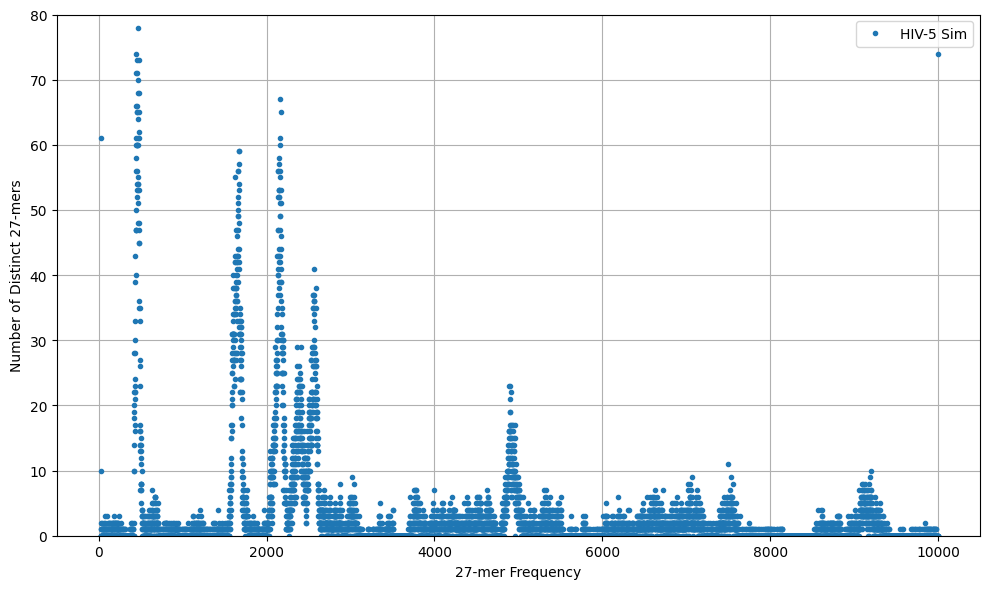

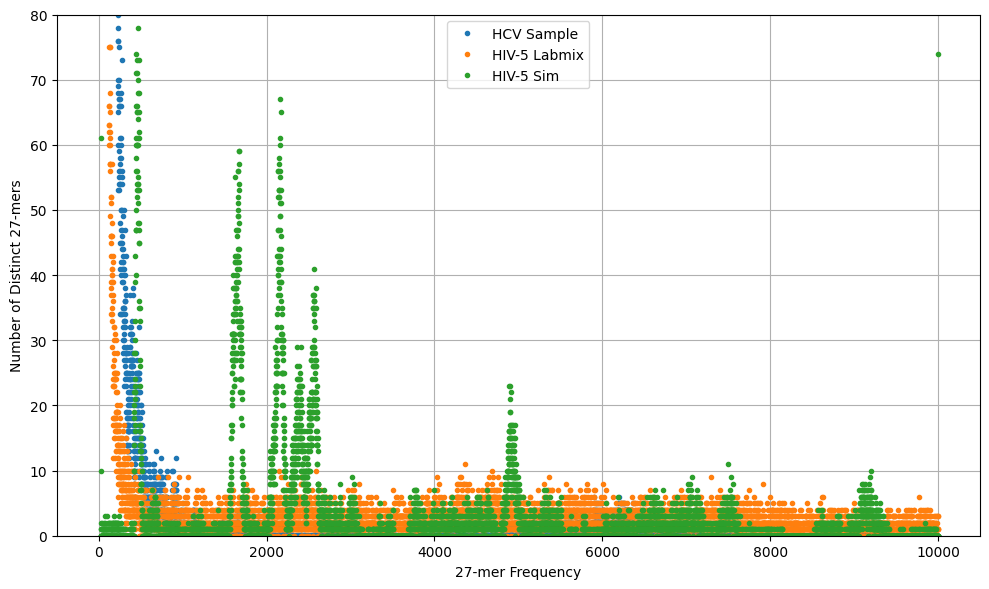

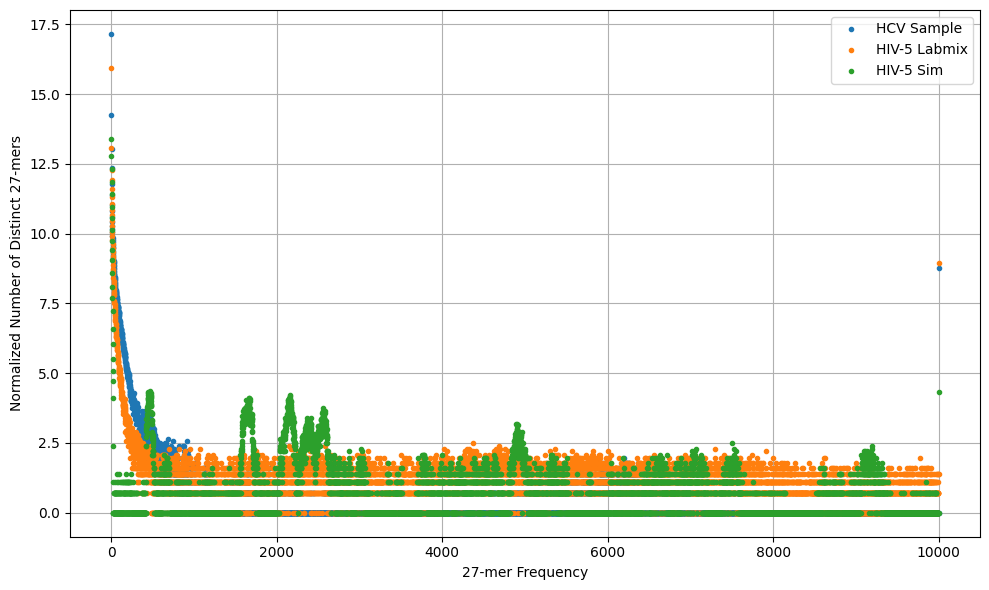

In [55]:
# plot the histograms
#plot hiv-5 labmix
plot_kmer_histograms({
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "hiv-5-sim-plot")

# not normalized
plot_kmer_histograms({
    "HCV Sample": "hcv-sample.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms")

# normalized
plot_kmer_histograms({
    "HCV Sample": "hcv-sample.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms_normalized", normalize=True)



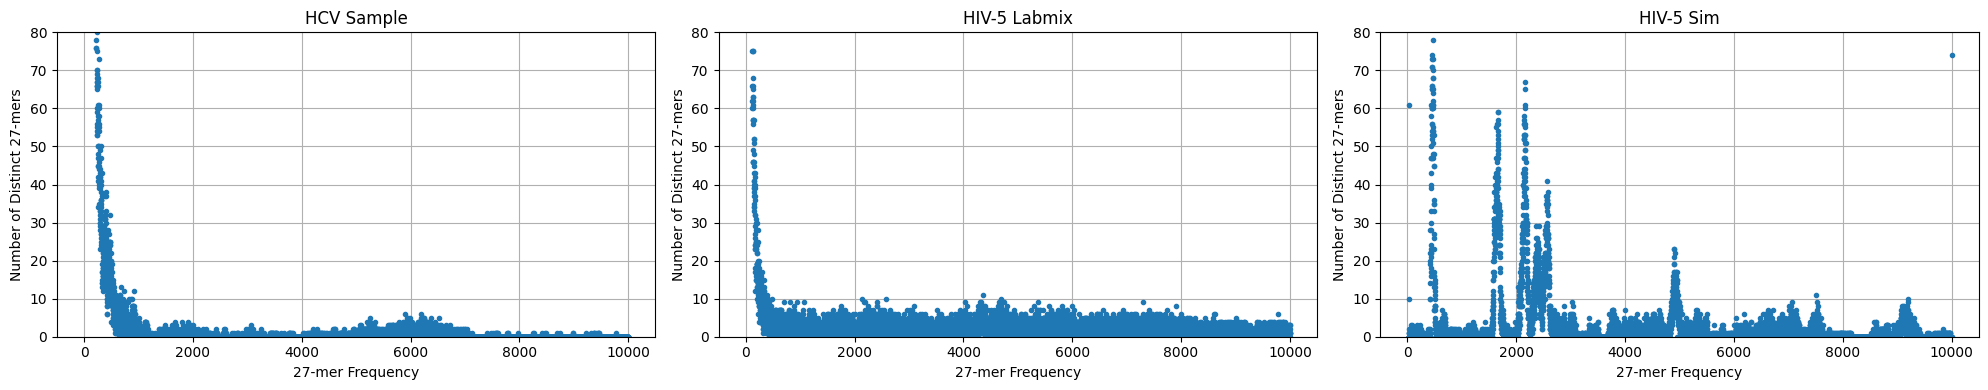

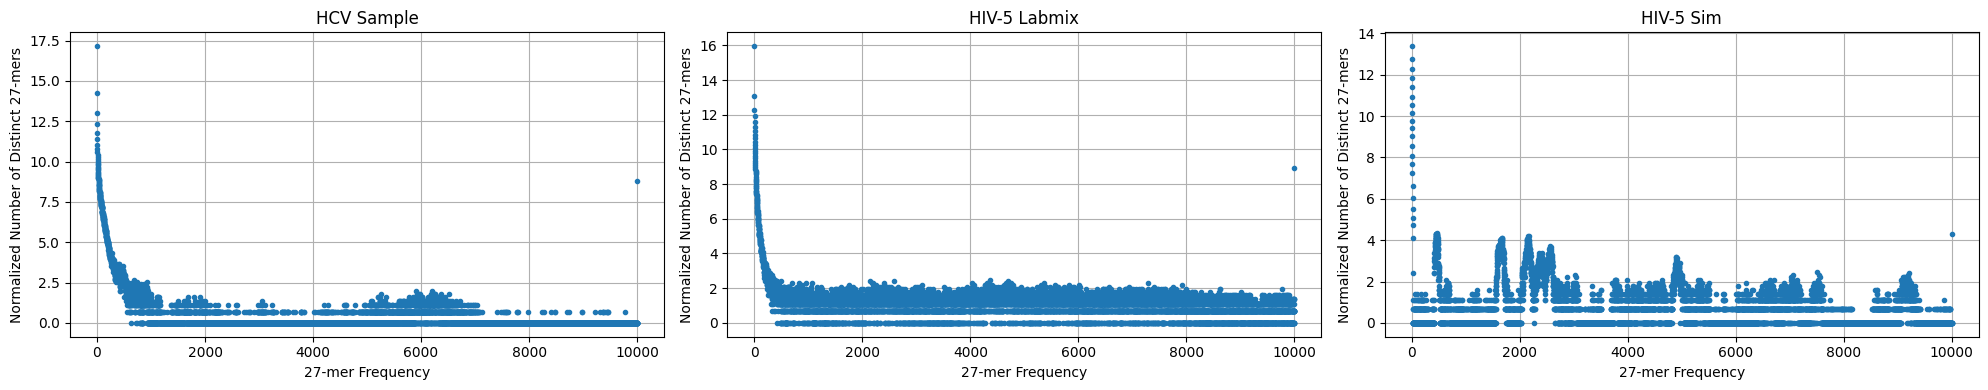

In [64]:
#plot histograms in subplots
plot_k_mer_histograms_subplots({
    "HCV Sample": "hcv-sample.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms", normalize=False)

plot_k_mer_histograms_subplots({
    "HCV Sample": "hcv-sample.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms_normalized", normalize=True)